# Companies with LinkedIn data

In [27]:
import pandas as pd
import numpy as np

In [28]:
found_companies = pd.read_csv('../data/companies-with-linkedin-data.csv', index_col=0)
found_companies.count()

Associated Company ID    612
Associated Company       612
Industry                 291
Deal Name                612
Deal Stage               612
LinkedIn description     600
LinkedIn size            584
LinkedIn specialties     427
LinkedIn established     495
LinkedIn id              612
LinkedIn url             612
LinkedIn Industry        596
dtype: int64

In [16]:
the_counts = found_companies['LinkedIn Industry'].value_counts()
the_counts.head(30)

Information Technology & Services        54
Internet                                 52
Computer Software                        49
Financial Services                       43
Hospital & Health Care                   22
Marketing & Advertising                  19
Insurance                                19
Non-profit Organization Management       14
Retail                                   13
Health, Wellness & Fitness               12
Design                                   12
Entertainment                            10
Telecommunications                       10
Management Consulting                    10
Higher Education                          9
Construction                              8
Transportation/Trucking/Railroad          8
Publishing                                7
Food & Beverages                          7
Medical Device                            7
Online Media                              7
Electrical & Electronic Manufacturing     7
Logistics & Supply Chain        

## Clean industries

In [29]:
df = found_companies.copy()

df['Industry'] = df['Industry'].str.replace(';', ' ')

# replace field that's entirely space (or empty) with NaN
df['Industry'] = df['Industry'].replace(r'^\s*$', np.nan, regex=True)

industries = df['Industry']
industries = industries.fillna('')
industries = industries.str.split()
industries = industries.apply(lambda x: ' '.join(set(x)))
industries = industries.replace('   ', '').replace('  ', '')
industries = industries.replace('', np.NaN)

df['Industry'] = industries
df['Industry'].value_counts()


E-commerce                                     52
Health Care                                    38
Financial                                      37
Government                                     13
Insurance                                      13
Non Profit                                     10
Travel                                          9
Automotive                                      5
Sports                                          4
Gaming                                          3
Technology                                      3
Technology Non Profit                           1
Publishing                                      1
Financial E-commerce                            1
Non Health Care Profit                          1
Entertainment                                   1
Insurance Financial                             1
Legal                                           1
Food Production                                 1
Government Financial E-commerce Health Care     1


## Hard replace industries

In [30]:
industries = df['Industry'].copy()

industries = industries.replace('Non Health Care Profit', 'Health Care')
industries = industries.replace('Technology Non Profit', 'Technology')
industries = industries.replace('Insurance Financial', 'Insurance')
industries = industries.replace('Financial E-commerce', 'Financial')
industries = industries.replace('Insurance Design', 'Design')
industries = industries.replace('E-commerce Gaming', 'Gaming')

industries.value_counts()

E-commerce                                     52
Health Care                                    39
Financial                                      38
Insurance                                      14
Government                                     13
Non Profit                                     10
Travel                                          9
Automotive                                      5
Gaming                                          4
Sports                                          4
Technology                                      4
Legal                                           1
Publishing                                      1
Entertainment                                   1
Design                                          1
Food Production                                 1
Government Financial E-commerce Health Care     1
Agriculture                                     1
Name: Industry, dtype: int64

In [31]:
found_companies['Raw Industries'] = found_companies['Industry'].copy()
found_companies['Industry'] = industries
found_companies.head()

,Associated Company ID,Associated Company,Industry,Deal Name,Deal Stage,LinkedIn description,LinkedIn size,LinkedIn specialties,LinkedIn established,LinkedIn id,LinkedIn url,LinkedIn Industry,Raw Industries
0,1005828045,Big Radical Limited,Non Profit,Web Community Project,0,Big Radical is a breakthrough design and innov...,11-50,"Innovation, Consultancy, design sprints, techn...",2017.0,big-radical,https://www.linkedin.com/company/big-radical/a...,Management Consulting,Non Profit
1,1006470667,psygro.co.za,NaN,Trudy Tanner - 8thlight.com contact,0,Psygro (Psychiatrische Groepspraktijk) biedt b...,51-200,NaN,NaN,psygro,https://www.linkedin.com/company/psygro/about/,Mental Health Care,NaN
2,1006849789,Care Coordination Systems,Health Care,CCS Pathways -- Admin Modules and Web Educatio...,0,Pathways Community HUB model Leading the Way t...,2-10,"Community Health, Pathways, HUB, Pathways Conn...",2013.0,beach-group,https://www.linkedin.com/company/beach-group/a...,Hospital & Health Care,Health Care
3,1011074056,KOS Services LLC,NaN,Erin Steinhardt - 8thlight.com contact,0,"KOS SERVICES, LLC is a medical practice compan...",201-500,NaN,NaN,kos-services-llc,https://www.linkedin.com/company/kos-services-...,Medical Practice,NaN
5,1015911460,Jellyvision,NaN,Mike Else - 8thlight.com contact,0,Jellyvision is an award-winning technology com...,201-500,"Benefits Communication, Interactive Conversati...",2001.0,jellyvision,https://www.linkedin.com/company/jellyvision/a...,Information Technology & Services,NaN


# Join deals with mined company data

In [41]:
completed_deals = pd.read_csv('../data/completed-or-current-deails-2019-10-29.csv')
lost_deals = pd.read_csv('../data/lost-deals-2019-10-28-1.csv')

completed_deals['Deal Stage'] = '1'
lost_deals['Deal Stage'] = '0'

deals_df = pd.concat([completed_deals, lost_deals], sort=False)
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1421 entries, 0 to 1000
Data columns (total 14 columns):
Deal ID                   1421 non-null int64
Deal Name                 1421 non-null object
Deal owner                1365 non-null object
Deal Stage                1421 non-null object
Sales Lead                1042 non-null object
Designated Office         1086 non-null object
Director                  982 non-null object
Industry                  366 non-null object
Source                    451 non-null object
Associated Company ID     1368 non-null object
Associated Company        1368 non-null object
Associated Contact IDs    708 non-null object
Associated Contacts       706 non-null object
Business Lines            847 non-null object
dtypes: int64(1), object(13)
memory usage: 166.5+ KB


In [42]:
deals_with_found_companies = pd.merge(deals_df, found_companies, on='Associated Company ID')

deals_with_found_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 0 to 1069
Data columns (total 26 columns):
Deal ID                   1070 non-null int64
Deal Name_x               1070 non-null object
Deal owner                1028 non-null object
Deal Stage_x              1070 non-null object
Sales Lead                785 non-null object
Designated Office         820 non-null object
Director                  756 non-null object
Industry_x                307 non-null object
Source                    350 non-null object
Associated Company ID     1070 non-null object
Associated Company_x      1070 non-null object
Associated Contact IDs    543 non-null object
Associated Contacts       541 non-null object
Business Lines            617 non-null object
Associated Company_y      1070 non-null object
Industry_y                510 non-null object
Deal Name_y               1070 non-null object
Deal Stage_y              1070 non-null object
LinkedIn description      1054 non-null object
LinkedIn s

In [81]:
completed_with_found_companies = pd.merge(completed_deals, found_companies, on='Associated Company ID')
completed_with_found_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 341
Data columns (total 27 columns):
Deal ID                   342 non-null int64
Deal Name_x               342 non-null object
Deal owner                337 non-null object
Deal Stage_x              342 non-null object
Sales Lead                276 non-null object
Designated Office         318 non-null object
Director                  305 non-null object
Industry_x                148 non-null object
Source                    173 non-null object
Associated Company ID     342 non-null object
Associated Company_x      342 non-null object
Associated Contact IDs    191 non-null object
Associated Contacts       190 non-null object
Associated Company_y      342 non-null object
Industry_y                251 non-null object
Deal Name_y               342 non-null object
Deal Stage_y              342 non-null object
LinkedIn description      342 non-null object
LinkedIn size             333 non-null object
LinkedIn specialties  

In [82]:
lost_with_found_companies = pd.merge(lost_deals, found_companies, on='Associated Company ID')
lost_with_found_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 727
Data columns (total 28 columns):
Deal ID                   728 non-null int64
Deal Name_x               728 non-null object
Deal owner                691 non-null object
Deal Stage_x              728 non-null object
Director                  451 non-null object
Sales Lead                509 non-null object
Designated Office         502 non-null object
Industry_x                159 non-null object
Source                    177 non-null object
Business Lines            617 non-null object
Associated Company ID     728 non-null object
Associated Company_x      728 non-null object
Associated Contact IDs    352 non-null object
Associated Contacts       351 non-null object
Associated Company_y      728 non-null object
Industry_y                259 non-null object
Deal Name_y               728 non-null object
Deal Stage_y              728 non-null object
LinkedIn description      712 non-null object
LinkedIn size         

## Company sizes

In [33]:
found_companies['LinkedIn size'].describe()

count       584
unique        9
top       11-50
freq        157
Name: LinkedIn size, dtype: object

### Sizes of all contacted companies

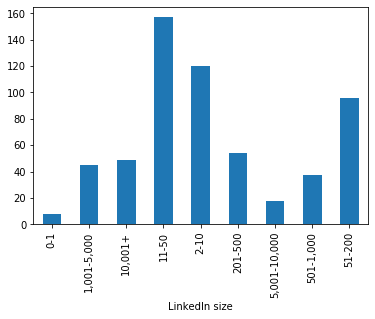

In [38]:
found_companies.groupby('LinkedIn size')['LinkedIn size'].count().plot(x='LinkedIn size', kind='bar')

In [58]:
completed_by_size_count = completed_with_found_companies.groupby('LinkedIn size').size().sort_index().reset_index()
completed_by_size_count.columns = ['LinkedIn size', 'Completed count']

lost_by_size_count = lost_with_found_companies.groupby('LinkedIn size').size().sort_index().reset_index()
lost_by_size_count.columns = ['LinkedIn size', 'Lost count']

size_comparison = pd.merge(completed_by_size_count, lost_by_size_count, on='LinkedIn size')

size_comparison.index = size_comparison['LinkedIn size'].str.len()
size_comparison = size_comparison.sort_index().reset_index(drop=True)

size_comparison.head(20)

,LinkedIn size,Completed count,Lost count
0,0-1,6,9
1,2-10,44,140
2,11-50,82,170
3,51-200,57,104
4,"10,001+",31,62
5,201-500,46,69
6,"501-1,000",37,53
7,"1,001-5,000",17,54
8,"5,001-10,000",13,34


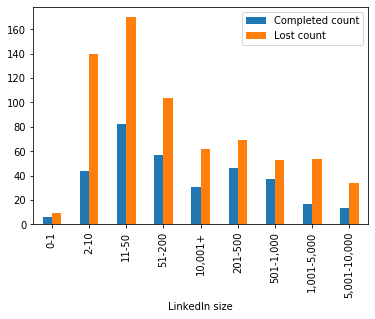

In [59]:
size_comparison.plot(x='LinkedIn size', kind='bar')

# Company age

In [77]:
import datetime
this_year = datetime.date.today().year

found_companies['Company age'] = found_companies['LinkedIn established']\
    .apply(lambda x: this_year-x)

found_companies['Company age'].value_counts()

108

In [78]:
def get_company_age_category(age):
    if (not age): age

    if (age in range(0, 1)):
        return '0-1'
    if (age in range(2, 5)):
        return '2-5'
    if (age in range(5, 10)):
        return '5-10'
    if (age in range(10, 20)):
        return '10-20'
    if (age in range(20, 100)):
        return '20-100'
    return '100+'

found_companies['Company age category'] = found_companies['Company age'].apply(lambda x: get_company_age_category(x))
found_companies['Company age category'].value_counts()

100+      160
20-100    149
5-10      129
10-20     126
2-5        48
Name: Company age category, dtype: int64

In [80]:
def prepare_column_comparison(completed_deals, lost_deals, column_name):
    completed_by_column_count = completed_deals.groupby(column_name).size().sort_index().reset_index()
    completed_by_column_count.columns = [column_name, 'Completed count']

    lost_by_column_count = lost_deals.groupby(column_name).size().sort_index().reset_index()
    lost_by_column_count.columns = [column_name, 'Lost count']

    comparison = pd.merge(completed_by_column_count, lost_by_column_count, on=column_name)

    comparison.index = comparison[column_name].str.len()
    comparison = size_comparison.sort_index().reset_index(drop=True)
    return comparison

In [84]:

age_comparison = prepare_column_comparison(completed_with_found_companies, lost_with_found_companies, 'Company age category')
age_comparison.head()

,LinkedIn size,Completed count,Lost count
0,0-1,6,9
1,2-10,44,140
2,11-50,82,170
3,51-200,57,104
4,"10,001+",31,62


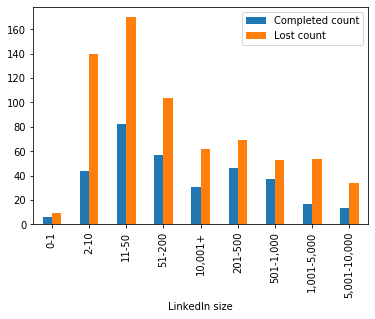

In [85]:
age_comparison.plot(x='LinkedIn size', kind='bar')

In [87]:
found_companies['Aggregated Industry'] = found_companies['LinkedIn Industry'] + ' '+ found_companies['Industry']
found_companies['Aggregated Industry'].value_counts()

Financial Services Financial                  22
Hospital & Health Care Health Care            14
Internet E-commerce                           13
Insurance Insurance                           11
Computer Software Health Care                  5
                                              ..
Consumer Services E-commerce                   1
Venture Capital & Private Equity Financial     1
Management Consulting Government               1
Fundraising Non Profit                         1
Music E-commerce                               1
Name: Aggregated Industry, Length: 92, dtype: int64